В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andrianazadorozhna
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 78.4MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-2/bank-customer-churn-prediction-dlu-course-c-2.zip to ./bank-customer-churn-prediction-dlu-course-c-2


In [5]:
import os

In [6]:
data_dir = './bank-customer-churn-prediction-dlu-course-c-2'

In [7]:
os.listdir(data_dir)

['test.csv', 'sample_submission.csv', 'train.csv']

In [8]:
train_csv = data_dir + '/train.csv'

In [9]:
import pandas as pd

In [68]:
raw_df = pd.read_csv(train_csv)

In [69]:
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = raw_df.drop(columns= "Exited")
y = raw_df["Exited"]

In [72]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = 0.2,
    random_state=42,
    stratify=y
)

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [73]:
input_cols = list(raw_df.columns)[:-1]
target_col = 'Exited'

print("Вхідні колонки:", input_cols)
print("Цільова колонка:", target_col)

Вхідні колонки: ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Цільова колонка: Exited


In [74]:
train_inputs = X_train[input_cols].copy()
train_targets = y_train.copy()

val_inputs = X_val[input_cols].copy()
val_targets = y_val.copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [75]:
numeric_cols = raw_df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = raw_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [76]:
print("Числові колонки:", numeric_cols)
print("Категоріальні колонки:", categorical_cols)

Числові колонки: ['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Категоріальні колонки: ['Surname', 'Geography', 'Gender']


4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

так як в нас є колонка ідентифікатор id, то я думаю, що колонку 'Surname' потрібно видалити з даних

In [77]:
train_inputs = train_inputs.drop(columns=['CustomerId', 'Surname'], errors='ignore')
val_inputs = val_inputs.drop(columns=['CustomerId', 'Surname'], errors='ignore')

In [78]:
train_inputs


,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7180,7180,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24
10393,10393,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31
80,80,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01
3365,3365,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98
12236,12236,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76
...,...,...,...,...,...,...,...,...,...,...,...
9493,9493,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05
8463,8463,673.0,France,Female,40.0,1.0,0.00,1.0,1.0,1.0,47832.82
8143,8143,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29
11512,11512,590.0,Spain,Male,42.0,7.0,0.00,2.0,0.0,0.0,72643.95


In [79]:
raw_df['Gender'].nunique()

2

In [80]:
raw_df['Geography'].value_counts()

,count
Geography,
France,9032
Spain,3303
Germany,2665


я вважаю, що Gender, Georaphy є досить важливими категоріальними значеннями для навчання моделі, тому їх потрібно заенкодити і додати пропущені значення найчастішим значенням (якщо пропуски є, бо в нашому випадку їх немає)

In [81]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [82]:
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

In [25]:
categorical_cols

['Geography', 'Gender']

In [83]:
numeric_cols = train_inputs.select_dtypes(include=['number']).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_cols = [col for col in numeric_cols if col != 'id']
categorical_cols = [col for col in categorical_cols if col != 'id']

print("Числові колонки після оновлення:", numeric_cols)
print("Категоріальні колонки після оновлення:", categorical_cols)

Числові колонки після оновлення: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Категоріальні колонки після оновлення: ['Geography', 'Gender']


In [84]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Нам потрібно масштабувати всі числові дані, щоб уникнути дисбалансу через різні одиниці вимірювання.

In [85]:
train_inputs[numeric_cols].isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [86]:
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [87]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [88]:
train_inputs_prepared = preprocessor.fit_transform(train_inputs)
val_inputs_prepared = preprocessor.transform(val_inputs)

In [89]:
categorical_feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))

final_columns = numeric_cols + categorical_feature_names

print("Форма оброблених даних (train_inputs_prepared):", train_inputs_prepared.shape)
print("Кількість назв колонок у final_columns:", len(final_columns))

train_inputs_prepared_df = pd.DataFrame(train_inputs_prepared, columns=final_columns, index=train_inputs.index)
val_inputs_prepared_df = pd.DataFrame(val_inputs_prepared, columns=final_columns, index=val_inputs.index)


Форма оброблених даних (train_inputs_prepared): (12000, 13)
Кількість назв колонок у final_columns: 13


In [90]:
print("Тренувальні дані після обробки (перші 5 рядків):")
display(train_inputs_prepared_df.head())

print("Валідаційні дані після обробки (перші 5 рядків):")
display(val_inputs_prepared_df.head())

Тренувальні дані після обробки (перші 5 рядків):


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,0.320187,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,1.0,0.0,0.0,0.0,1.0
10393,0.347838,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,1.0,0.0,0.0,1.0,0.0
80,0.638166,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,0.0,1.0,0.0,0.0,1.0
3365,0.140460,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,0.0,0.0,1.0,0.0,1.0
12236,0.665816,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,1.0,0.0,0.0,0.0,1.0


Валідаційні дані після обробки (перші 5 рядків):


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6490,0.762592,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,0.0,1.0,0.0,0.0,1.0
3646,-0.910252,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,1.0,0.0,0.0,0.0,1.0
5306,0.997620,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,1.0,0.0,0.0,1.0,0.0
652,0.195761,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,1.0,0.0,0.0,1.0,0.0
2627,0.264887,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [91]:
train_inputs_df = pd.DataFrame(train_inputs_prepared, columns=final_columns, index=train_inputs.index)
val_inputs_df = pd.DataFrame(val_inputs_prepared, columns=final_columns, index=val_inputs.index)

In [92]:
train_targets_df = pd.DataFrame(train_targets, columns=['Exited'], index=train_inputs.index)
val_targets_df = pd.DataFrame(val_targets, columns=['Exited'], index=val_inputs.index)

In [93]:
train_inputs_df.to_parquet('train_inputs.parquet', index=False)
val_inputs_df.to_parquet('val_inputs.parquet', index=False)
train_targets_df.to_parquet('train_targets.parquet', index=False)
val_targets_df.to_parquet('val_targets.parquet', index=False)

In [94]:
saved_files = [file for file in os.listdir() if file.endswith('.parquet')]
print("\nСписок збережених файлів:")
print(saved_files)


Список збережених файлів:
['train_inputs.parquet', 'val_targets.parquet', 'val_inputs.parquet', 'train_targets.parquet']


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [96]:
train_inputs_df = train_inputs_df.assign(id=train_inputs['id'])
val_inputs_df = val_inputs_df.assign(id=val_inputs['id'])


In [97]:
X_train = train_inputs_df.drop(columns=['id'])
X_val = val_inputs_df.drop(columns=['id'])

y_train = train_targets_df['Exited']
y_val = val_targets_df['Exited']

In [98]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# оцінка якості моделі
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2390
         1.0       0.73      0.57      0.64       610

    accuracy                           0.87      3000
   macro avg       0.81      0.76      0.78      3000
weighted avg       0.86      0.87      0.86      3000

Accuracy Score:
0.8696666666666667


7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [99]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

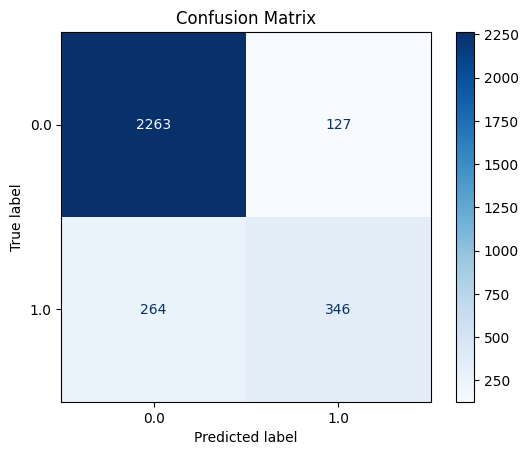

In [100]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

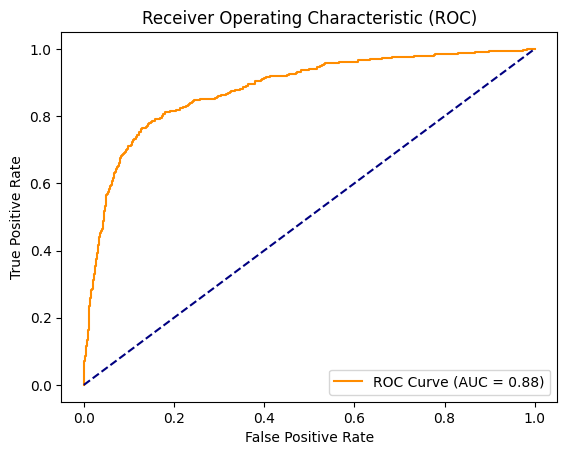

In [101]:
y_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = roc_auc_score(y_val, y_proba)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

In [102]:
f1 = f1_score(y_val, y_pred)
print(f"F1 Score (Threshold = 0.5): {f1:.2f}")

F1 Score (Threshold = 0.5): 0.64


**Висновок**

**Confusion Matrix:** Модель має високу кількість правильних передбачень для класу "0" (не залишили банк), але вона пропускає частину клієнтів із класу "1" (залишили банк), що свідчить про дисбаланс між класами.

**ROC-AUC:** Значення AUC = 0.88 вказує на хорошу здатність моделі розрізняти між позитивними та негативними класами. Це свідчить про те, що модель працює краще, ніж випадкове вгадування.

**F1-Score:** Значення F1-Score = 0.64 для порога 0.5 означає, що модель має помірний баланс між точністю (precision) і повнотою (recall) для класу "1".

 Бачимо що модель добре справляється з класифікацією клієнтів, які не залишають банк, але точність для клієнтів, які залишають банк, потребує покращення.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [103]:
raw_df['Exited'].value_counts()

,count
Exited,
0.0,11948
1.0,3052


In [104]:
from sklearn.metrics import accuracy_score

majority_class = y_train.value_counts().idxmax()


y_train_majority_pred = [majority_class] * len(y_train)
y_val_majority_pred = [majority_class] * len(y_val)

train_accuracy_majority = accuracy_score(y_train, y_train_majority_pred)
val_accuracy_majority = accuracy_score(y_val, y_val_majority_pred)

print(f"Accuracy на тренувальних даних (мажоритарний клас): {train_accuracy_majority:.2f}")
print(f"Accuracy на валідаційних даних (мажоритарний клас): {val_accuracy_majority:.2f}")

Accuracy на тренувальних даних (мажоритарний клас): 0.80
Accuracy на валідаційних даних (мажоритарний клас): 0.80



Точність моделі, яка завжди передбачає мажоритарний клас, складає 80%, оскільки клас 0 (клієнти, які не залишили банк) домінує в даних. Схоже на те, що така модель не враховує особливості даних і просто використовує дисбаланс класів.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [105]:
import joblib


In [106]:
saved_objects = {
    "model": model,
    "train_inputs_columns": X_train.columns.tolist(),
    "numeric_transformer": numeric_transformer,
    "categorical_transformer": categorical_transformer,
    "preprocessor": preprocessor  # весь ColumnTransformer
}

In [107]:
joblib.dump(saved_objects, 'log_reg.joblib')

['log_reg.joblib']

In [108]:
loaded_objects = joblib.load('log_reg.joblib')
model_2 = loaded_objects["model"]

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [109]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [110]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

NameError: name 'scaler' is not defined

In [111]:
# Видаляємо 'Surname' і 'CustomerId', але залишаємо 'id'
raw_df_cleaned = raw_df.drop(columns=['Surname', 'CustomerId'])


In [112]:
def predict_raw_df(preprocessor, model, input_df: pd.DataFrame):
    """
    Функція робить підготовку даних за допомогою preprocessor і прогнозує ймовірності класу 1.

    Parameters:
    - preprocessor: ColumnTransformer для підготовки даних
    - model: Навчена модель (LogisticRegression або інша)
    - input_df: pd.DataFrame із вхідними даними

    Returns:
    - Ймовірності класу 1
    """
    # Видаляємо колонку 'id', оскільки вона не використовується у моделі
    input_df = input_df.drop(columns=['id'])

    # Препроцесинг даних
    X_input_prepared = preprocessor.transform(input_df)

    # Передбачення ймовірностей
    prob = model.predict_proba(X_input_prepared)[:, 1]

    return prob

# Виклик функції
probabilities = predict_raw_df(
    preprocessor=preprocessor,
    model=model,
    input_df=raw_df_cleaned[:5]  # Використовуємо очищений набір даних
)

print("Ймовірності класу 1 для перших 5 рядків:")
print(probabilities)


Ймовірності класу 1 для перших 5 рядків:
[0.00564915 0.03331584 0.38132823 0.38028102 0.97920024]


11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [119]:
test_csv = data_dir + '/test.csv'

In [120]:
test_raw_df = pd.read_csv(test_csv)

In [121]:
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [122]:
test_raw_df_cleaned = test_raw_df.copy()

columns_to_drop = ['Surname', 'CustomerId']
test_raw_df_cleaned = test_raw_df_cleaned.drop(columns=columns_to_drop, errors='ignore')

test_raw_df_cleaned['Exited'] = predict_raw_df(
    preprocessor=preprocessor,
    model=model,
    input_df=test_raw_df_cleaned
)

print("Перші 5 рядків після передбачення:")
display(test_raw_df_cleaned.head())


Перші 5 рядків після передбачення:


,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15000,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.069305
1,15001,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,0.033363
2,15002,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,0.153864
3,15003,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.198330
4,15004,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.054045


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [123]:
submission_csv_path = data_dir + '/sample_submission.csv'
submission_df = pd.read_csv(submission_csv_path)

print("Перші 5 рядків sample_submission.csv:")
display(submission_df.head())

submission_df['Exited'] = predict_raw_df(
    preprocessor=preprocessor,
    model=model,
    input_df=test_raw_df_cleaned
)
print("Перші 5 рядків фінального результату:")
display(submission_df.head())

submission_csv_output = 'submission_log_reg.csv'
submission_df.to_csv(submission_csv_output, index=False)

print(f"Файл {submission_csv_output} успішно збережено.")


Перші 5 рядків sample_submission.csv:


,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


Перші 5 рядків фінального результату:


,id,Exited
0,15000,0.069305
1,15001,0.033363
2,15002,0.153864
3,15003,0.198330
4,15004,0.054045


Файл submission_log_reg.csv успішно збережено.
